In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("Property_with_Feature_Engineering.csv")

In [5]:
df.head()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    191393 non-null  int64  
 1   location_id    191393 non-null  int64  
 2   page_url       191393 non-null  object 
 3   property_type  191393 non-null  object 
 4   price          191393 non-null  int64  
 5   price_bin      191393 non-null  object 
 6   location       191393 non-null  object 
 7   city           191393 non-null  object 
 8   province_name  191393 non-null  object 
 9   locality       191393 non-null  object 
 10  latitude       191393 non-null  float64
 11  longitude      191393 non-null  float64
 12  baths          191393 non-null  int64  
 13  area           191393 non-null  object 
 14  area_marla     191393 non-null  float64
 15  area_sqft      191393 non-null  float64
 16  purpose        191393 non-null  object 
 17  bedrooms       191393 non-nul

In [151]:
df.shape

(191393, 24)

In [6]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
price_bin            0
location             0
city                 0
province_name        0
locality             0
latitude             0
longitude            0
baths                0
area                 0
area_marla           0
area_sqft            0
purpose              0
bedrooms             0
date_added           0
year                 0
month                0
day                  0
agency           47379
agent            47380
dtype: int64

EDA
Now we explore the data and observe the feature which are more relative to each and important for our final Machine learning Model


In [6]:
# After exploring the feature it is observed that first two features are not relevant to ML property id, url, locationid,
# It is also observed that also the last  feature agent Name, Agency, year, month , day are also not relavant as it 
# the date of posting the add which is not to our need for current model
# so we are locking our dataframe to the relvant feature for now and explore more
df=df.iloc[:,3:]

In [7]:
df=df.iloc[:,:-2]

In [8]:
df.head()

,property_type,price,price_bin,location,city,province_name,locality,latitude,longitude,baths,area,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day
0,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",31.483869,74.325686,0,6 Kanal,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17
1,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",31.431593,74.179980,5,1 Kanal,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6
2,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",31.499348,74.416959,0,9 Marla,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3
3,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",31.522069,74.355512,7,1 Kanal,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4
4,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",31.506483,74.286017,5,11 Marla,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4


In [10]:
df.shape

(191393, 19)

In [11]:
df['purpose'].value_counts()

For Sale    127018
For Rent     64375
Name: purpose, dtype: int64

In [9]:
# we are creating the sale value prediction model 
# filter the value with purpose feature by For Rent
# Droping the For Rent Instances from our dataframe for this model
df.drop(df[df['purpose']=='For Rent'].index, inplace=True)

In [14]:
df['purpose']

0         For Sale
1         For Sale
2         For Sale
3         For Sale
4         For Sale
            ...   
190971    For Sale
190972    For Sale
190973    For Sale
190974    For Sale
190975    For Sale
Name: purpose, Length: 127018, dtype: object

In [10]:
df.drop(['purpose'],axis=1,inplace=True)

In [16]:
df.shape

(127018, 18)

In [17]:
# now we explore the property type feature 
df["property_type"].value_counts()


House            93809
Flat             28610
Upper Portion     2641
Lower Portion     1010
Farm House         628
Penthouse          295
Room                25
Name: property_type, dtype: int64

In [11]:
#As observed the porperty_type feature is Nominal Categorical feature 
# So we can apply OneHotEncoding prepare it for ML
property_type=pd.get_dummies(df["property_type"], drop_first=True)

In [19]:
property_type.head()

,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [20]:
#Now we explore the price_bin feature
# As depth analysis this feature is ordinal categorical value the higher the price the price bin is high value
df["price_bin"].value_counts()

Low          32843
Medium       31631
High         31450
Very High    31094
Name: price_bin, dtype: int64

In [12]:
# now replacing the categorical value with numerical value
df.replace({"Low":0, "Medium":1, "High":2, "Very High":3 }, inplace=True)

In [22]:
df.head()

,property_type,price,price_bin,location,city,province_name,locality,latitude,longitude,baths,area,area_marla,area_sqft,bedrooms,date_added,year,month,day
0,House,220000000,3,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",31.483869,74.325686,0,6 Kanal,120.0,32670.12,0,07-17-2019,2019,7,17
1,House,40000000,3,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",31.431593,74.179980,5,1 Kanal,20.0,5445.02,5,10-06-2018,2018,10,6
2,House,9500000,0,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",31.499348,74.416959,0,9 Marla,9.0,2450.26,3,07-03-2019,2019,7,3
3,House,125000000,3,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",31.522069,74.355512,7,1 Kanal,20.0,5445.02,8,04-04-2019,2019,4,4
4,House,21000000,2,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",31.506483,74.286017,5,11 Marla,11.0,2994.76,6,04-04-2019,2019,4,4


In [23]:
df.shape

(127018, 18)

In [24]:
# now we explore the city 
df["city"].value_counts()

Karachi       46669
Lahore        45218
Islamabad     17219
Rawalpindi    12720
Faisalabad     5192
Name: city, dtype: int64

In [13]:
# As we explore we find the city feature as Nominal value 
# so we apply One hot Encoding
city=pd.get_dummies(df["city"],drop_first=True)

In [26]:
city.head()

,Islamabad,Karachi,Lahore,Rawalpindi
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [14]:
# now we explore the province the province feature
# we apply the same as city feature 
province=pd.get_dummies(df["province_name"],drop_first=True)

In [28]:
province.head()

,Punjab,Sindh
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [29]:
# Now we explore locality and location
df["location"].value_counts()

DHA Defence               16558
Bahria Town Karachi        7682
Bahria Town                6478
Gulistan-e-Jauhar          4735
Bahria Town Rawalpindi     4300
                          ...  
Zafar ul Haq Road             1
PTV Colony                    1
Raheemabad                    1
Abu Alkhair Road              1
Angori Scheme 1               1
Name: location, Length: 1460, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['location']=le.fit_transform(df['location'])


In [31]:
df.head()

,property_type,price,price_bin,location,city,province_name,locality,latitude,longitude,baths,area,area_marla,area_sqft,bedrooms,date_added,year,month,day
0,House,220000000,3,929,Lahore,Punjab,"Model Town, Lahore, Punjab",31.483869,74.325686,0,6 Kanal,120.0,32670.12,0,07-17-2019,2019,7,17
1,House,40000000,3,950,Lahore,Punjab,"Multan Road, Lahore, Punjab",31.431593,74.179980,5,1 Kanal,20.0,5445.02,5,10-06-2018,2018,10,6
2,House,9500000,0,408,Lahore,Punjab,"Eden, Lahore, Punjab",31.499348,74.416959,0,9 Marla,9.0,2450.26,3,07-03-2019,2019,7,3
3,House,125000000,3,541,Lahore,Punjab,"Gulberg, Lahore, Punjab",31.522069,74.355512,7,1 Kanal,20.0,5445.02,8,04-04-2019,2019,4,4
4,House,21000000,2,114,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",31.506483,74.286017,5,11 Marla,11.0,2994.76,6,04-04-2019,2019,4,4


In [32]:
df['locality'].value_counts()

DHA Defence, Lahore, Punjab                  8126
Bahria Town Karachi, Karachi, Sindh          7682
DHA Defence, Karachi, Sindh                  6327
Bahria Town, Lahore, Punjab                  5306
Gulistan-e-Jauhar, Karachi, Sindh            4735
                                             ... 
Gangaal, Rawalpindi, Punjab                     1
Chak 8 JB Punj Garain, Faisalabad, Punjab       1
Karachi, Sindh, Karachi, Sindh                  1
Combo Colony, Lahore, Punjab                    1
Angori Scheme 1, Lahore, Punjab                 1
Name: locality, Length: 1538, dtype: int64

In [16]:
# droping the property_type, city , province name and locality from our dataframe 
# we extacted the values out of these features
df.drop(['property_type','city','province_name'],axis=1,inplace=True)

In [17]:
# location and locality have approx the same we extracted the feature from these features
df.drop(['locality'],axis=1, inplace=True)

In [35]:
df.head()


,price,price_bin,location,latitude,longitude,baths,area,area_marla,area_sqft,bedrooms,date_added,year,month,day
0,220000000,3,929,31.483869,74.325686,0,6 Kanal,120.0,32670.12,0,07-17-2019,2019,7,17
1,40000000,3,950,31.431593,74.179980,5,1 Kanal,20.0,5445.02,5,10-06-2018,2018,10,6
2,9500000,0,408,31.499348,74.416959,0,9 Marla,9.0,2450.26,3,07-03-2019,2019,7,3
3,125000000,3,541,31.522069,74.355512,7,1 Kanal,20.0,5445.02,8,04-04-2019,2019,4,4
4,21000000,2,114,31.506483,74.286017,5,11 Marla,11.0,2994.76,6,04-04-2019,2019,4,4


In [18]:
# droping latitue and lonitude for this model beacause the same as in location
df.drop(['latitude', 'longitude','area','area_marla','date_added','year','month','day'],axis=1, inplace=True )

In [38]:
df.head()

,price,price_bin,location,baths,area_sqft,bedrooms
0,220000000,3,929,0,32670.12,0
1,40000000,3,950,5,5445.02,5
2,9500000,0,408,0,2450.26,3
3,125000000,3,541,7,5445.02,8
4,21000000,2,114,5,2994.76,6


In [39]:
df.shape

(127018, 6)

In [182]:
df.isnull().sum()

price         0
price_bin     0
location      0
baths         0
area          0
area_marla    0
area_sqft     0
purpose       0
bedrooms      0
date_added    0
year          0
month         0
day           0
dtype: int64

In [40]:
df.head()

,price,price_bin,location,baths,area_sqft,bedrooms
0,220000000,3,929,0,32670.12,0
1,40000000,3,950,5,5445.02,5
2,9500000,0,408,0,2450.26,3
3,125000000,3,541,7,5445.02,8
4,21000000,2,114,5,2994.76,6


In [19]:
train_df=pd.concat([df, city, province,property_type], axis=1)

In [20]:
train_df

,price,price_bin,location,baths,area_sqft,bedrooms,Islamabad,Karachi,Lahore,Rawalpindi,Punjab,Sindh,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,220000000,3,929,0,32670.12,0,0,0,1,0,1,0,0,1,0,0,0,0
1,40000000,3,950,5,5445.02,5,0,0,1,0,1,0,0,1,0,0,0,0
2,9500000,0,408,0,2450.26,3,0,0,1,0,1,0,0,1,0,0,0,0
3,125000000,3,541,7,5445.02,8,0,0,1,0,1,0,0,1,0,0,0,0
4,21000000,2,114,5,2994.76,6,0,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190971,3600000,0,338,2,1361.25,2,1,0,0,0,0,0,0,1,0,0,0,0
190972,17000000,2,472,5,1089.00,4,1,0,0,0,0,0,0,1,0,0,0,0
190973,16800000,2,472,5,1089.00,4,1,0,0,0,0,0,0,1,0,0,0,0
190974,26500000,2,472,7,2178.01,5,1,0,0,0,0,0,0,1,0,0,0,0


In [21]:
train_df.dropna(axis=0, inplace=True)

In [44]:
train_df.shape


(127018, 18)

In [45]:
train_df.head()

,price,price_bin,location,baths,area_sqft,bedrooms,Islamabad,Karachi,Lahore,Rawalpindi,Punjab,Sindh,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,220000000,3,929,0,32670.12,0,0,0,1,0,1,0,0,1,0,0,0,0
1,40000000,3,950,5,5445.02,5,0,0,1,0,1,0,0,1,0,0,0,0
2,9500000,0,408,0,2450.26,3,0,0,1,0,1,0,0,1,0,0,0,0
3,125000000,3,541,7,5445.02,8,0,0,1,0,1,0,0,1,0,0,0,0
4,21000000,2,114,5,2994.76,6,0,0,1,0,1,0,0,1,0,0,0,0


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127018 entries, 0 to 190975
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          127018 non-null  int64  
 1   price_bin      127018 non-null  int64  
 2   location       127018 non-null  int32  
 3   baths          127018 non-null  int64  
 4   area_sqft      127018 non-null  float64
 5   bedrooms       127018 non-null  int64  
 6   Islamabad      127018 non-null  uint8  
 7   Karachi        127018 non-null  uint8  
 8   Lahore         127018 non-null  uint8  
 9   Rawalpindi     127018 non-null  uint8  
 10  Punjab         127018 non-null  uint8  
 11  Sindh          127018 non-null  uint8  
 12  Flat           127018 non-null  uint8  
 13  House          127018 non-null  uint8  
 14  Lower Portion  127018 non-null  uint8  
 15  Penthouse      127018 non-null  uint8  
 16  Room           127018 non-null  uint8  
 17  Upper Portion  127018 non-nul

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

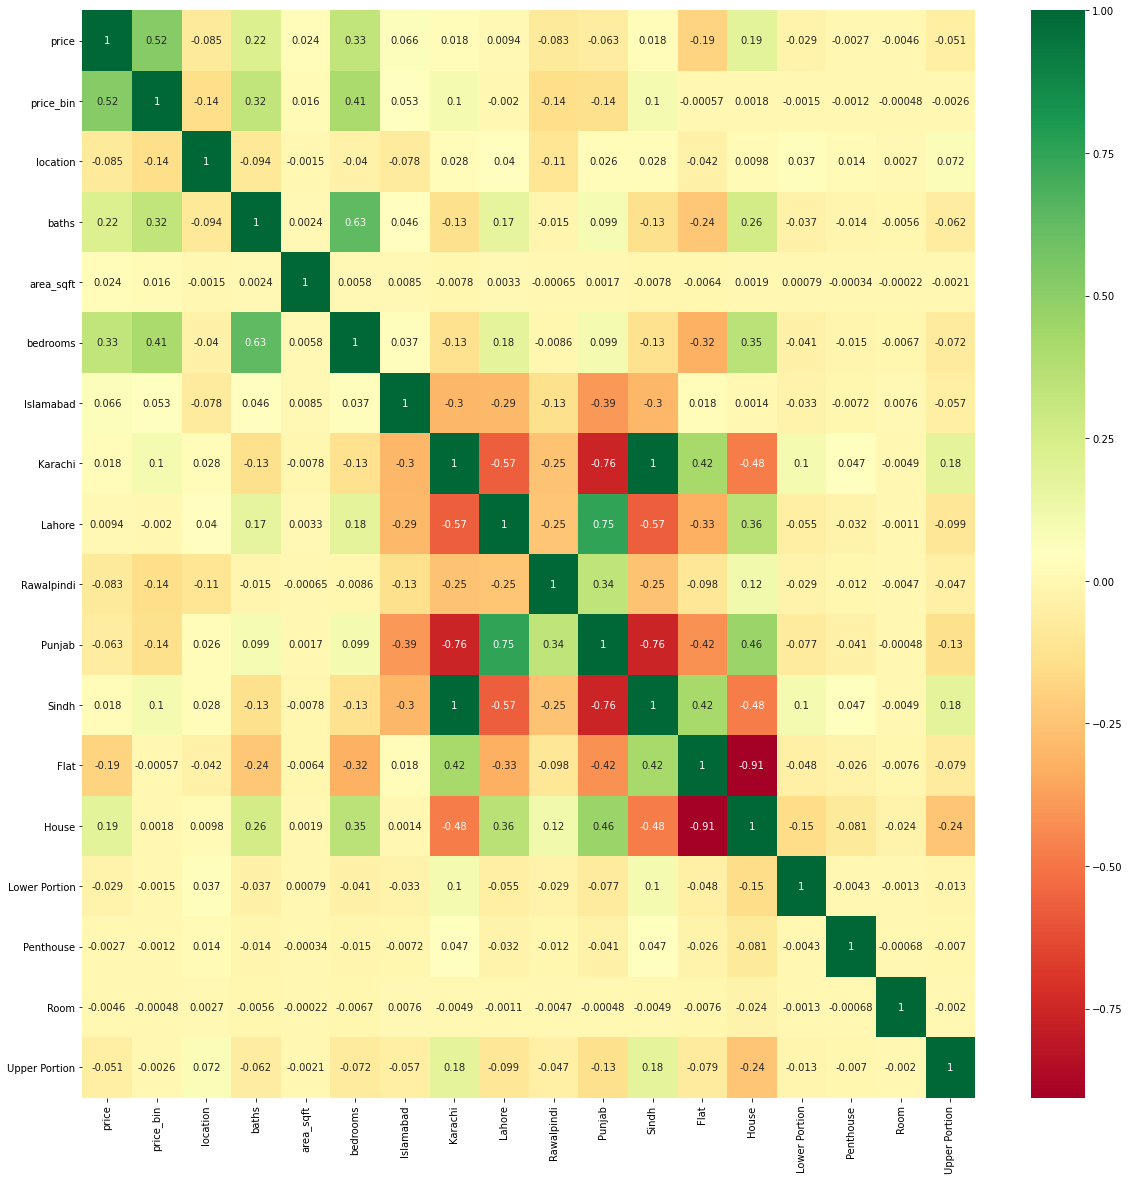

In [48]:
cormat = train_df.corr()
top_corr_features=cormat.index
plt.figure(figsize=(20,20))
#plot heatmap
sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
X=train_df.iloc[:,1:]

In [24]:
y=train_df.iloc[:,0]

In [56]:
X.head()

,price_bin,location,baths,area_sqft,bedrooms,Islamabad,Karachi,Lahore,Rawalpindi,Punjab,Sindh,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,3,929,0,32670.12,0,0,0,1,0,1,0,0,1,0,0,0,0
1,3,950,5,5445.02,5,0,0,1,0,1,0,0,1,0,0,0,0
2,0,408,0,2450.26,3,0,0,1,0,1,0,0,1,0,0,0,0
3,3,541,7,5445.02,8,0,0,1,0,1,0,0,1,0,0,0,0
4,2,114,5,2994.76,6,0,0,1,0,1,0,0,1,0,0,0,0


In [25]:
y.head()

0    220000000
1     40000000
2      9500000
3    125000000
4     21000000
Name: price, dtype: int64

In [26]:
#important feature extraction from ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor


In [27]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [28]:
print(model.feature_importances_)

[3.47033233e-01 9.89746723e-02 2.49960331e-02 3.54904513e-01
 4.94805044e-02 3.40470664e-03 6.23423578e-03 4.04912956e-03
 1.97399971e-03 2.26562526e-02 6.45262166e-03 7.00295160e-03
 7.07268068e-02 2.99029311e-04 8.83841999e-04 1.51601454e-04
 7.75866969e-04]


In [29]:
from sklearn.ensemble import ExtraTreesRegressor

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [31]:
X_train

,price_bin,location,baths,area_sqft,bedrooms,Islamabad,Karachi,Lahore,Rawalpindi,Punjab,Sindh,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
127102,2,192,6,2722.51,5,0,0,1,0,1,0,0,1,0,0,0,0
151234,2,193,3,2178.01,3,0,1,0,0,0,1,0,1,0,0,0,0
40811,1,458,3,1089.00,3,0,1,0,0,0,1,1,0,0,0,0,0
34023,0,174,2,843.98,2,1,0,0,0,0,0,1,0,0,0,0,0
130786,3,192,7,5445.02,6,0,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32707,0,317,2,1089.00,3,0,0,0,1,1,0,1,0,0,0,0,0
127804,0,665,2,816.75,2,0,0,1,0,1,0,0,1,0,0,0,0
121822,2,193,3,2178.01,3,0,1,0,0,0,1,0,1,0,0,0,0
35630,2,338,4,2722.51,4,0,0,1,0,1,0,0,1,0,0,0,0


In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [33]:
#Hyperparameters
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [34]:
#RandomizeSearchCV
## Number of trees in Random Forest
n_estimator=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
#number of feature to consider at every split
max_features=['auto', 'sqrt']
#maximum numbers of levels in tree
max_depth=[int(x) for x in np.linspace(5,6, num=6)]
#max depth append(none)
#minimum number of sample required to split a node
min_samples_split=[2,5,10,15,100]
#minimum number of sample required at each leaf node
min_samples_leaf = [1,2,5,10]
        

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
#Create the Random Grid
random_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 5, 5, 5, 5, 6], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [37]:
#use random grid to search for the hyperparameters
#first create the best model to tune
rf=RandomForestRegressor()

In [38]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid,scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [39]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  32.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  35.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  44.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  29.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  32.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 1.6min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.4min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 5, 5, 5, 5, 6],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
predictions=rf_random.predict(X_test)

In [41]:
predictions

array([ 6219221.73947845, 12901934.33141411, 21746667.68597475, ...,
       84660938.20299384,  6238296.02334822, 22824056.28744171])

C:\Users\jamil\anaconda3\envs\PropertyPrice\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

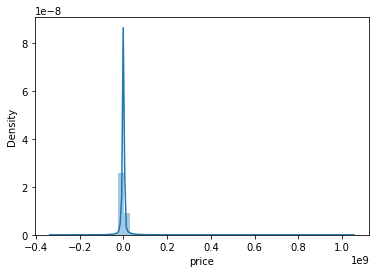

In [42]:
sns.distplot(y_test-predictions)

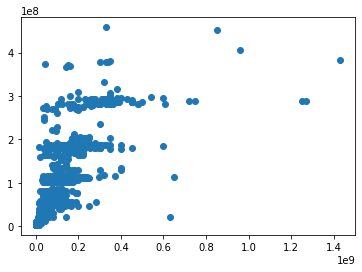

In [43]:
plt.scatter(y_test, predictions)

In [46]:
# model Accuracy
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7324154248071726